# Libraries and Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# LA ZRI Data

## Import Data

Apartment only data have 54 zip codes. All homes data have 96 zip codes. To compare with NYC, use apartment only data?

In [124]:
raw = pd.read_csv('../data/zri/Zip_Zri_MultiFamilyResidenceRental.csv',dtype={'RegionName':'object'})
# raw = pd.read_csv('../data/zri/Zip_Zri_AllHomesPlusMultifamily.csv',dtype={'RegionName':'object'})
raw.columns = raw.columns.str.replace('RegionName', 'zip')
raw = raw[raw['City'] == 'Los Angeles']

In [125]:
region = raw.iloc[:,:7].set_index('zip')
data = pd.concat([raw['zip'],raw.iloc[:,11:-1]],axis=1).set_index('zip')

In [126]:
region.shape

(54, 6)

## Data Cleaning

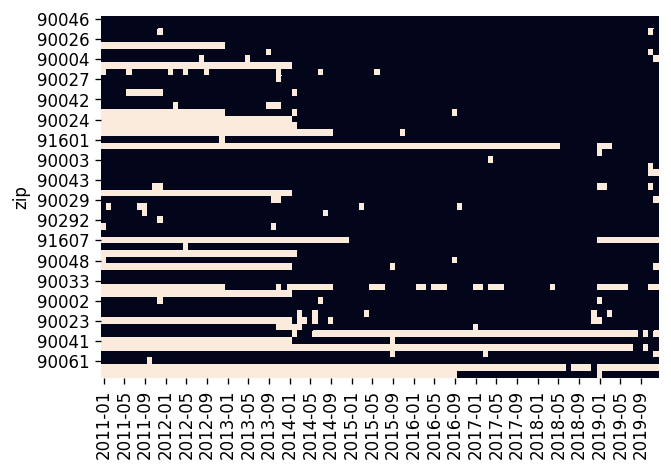

In [127]:
import seaborn as sns
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
sns.heatmap(data.isnull(), cbar=False)

(array([32.,  3.,  0.,  0.,  2.,  0.,  4.,  4.,  2.,  0.,  1.,  1.,  1.,
         1.,  0.,  0.,  0.,  1.,  0.,  2.]),
 array([0.        , 0.04907407, 0.09814815, 0.14722222, 0.1962963 ,
        0.24537037, 0.29444444, 0.34351852, 0.39259259, 0.44166667,
        0.49074074, 0.53981481, 0.58888889, 0.63796296, 0.68703704,
        0.73611111, 0.78518519, 0.83425926, 0.88333333, 0.93240741,
        0.98148148]),
 <a list of 20 Patch objects>)

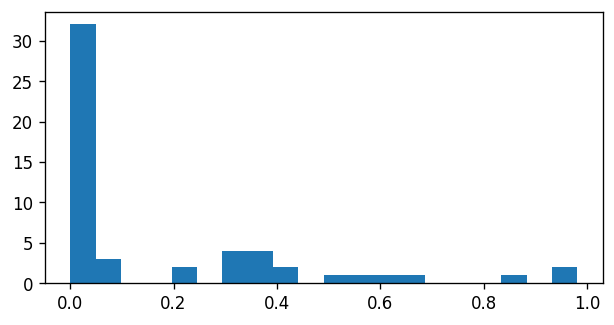

In [128]:
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plt.hist(data.isna().mean(axis=1),bins=20)

In [129]:
good = data.isna().mean(axis=1) <= 0.2
region = region[good]
data = data[good]
region.shape

(35, 6)

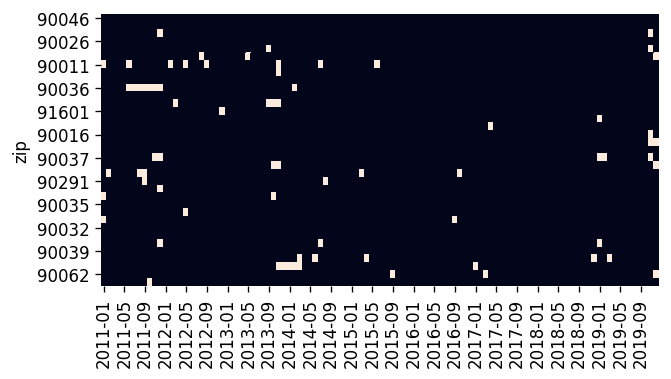

In [130]:
sns.heatmap(data.isnull(), cbar=False)

In [131]:
city = data.interpolate(method='linear',limit_direction='both', axis=1)

In [132]:
def plot_interpolate(zipcode):
    plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
    fig, axes = plt.subplots(1, 2)
    data[data.index==zipcode].T.plot(ax=axes[0])
    axes[0].set_title('Original')
    city[city.index==zipcode].T.plot(ax=axes[1])
    axes[1].set_title('interpolated')

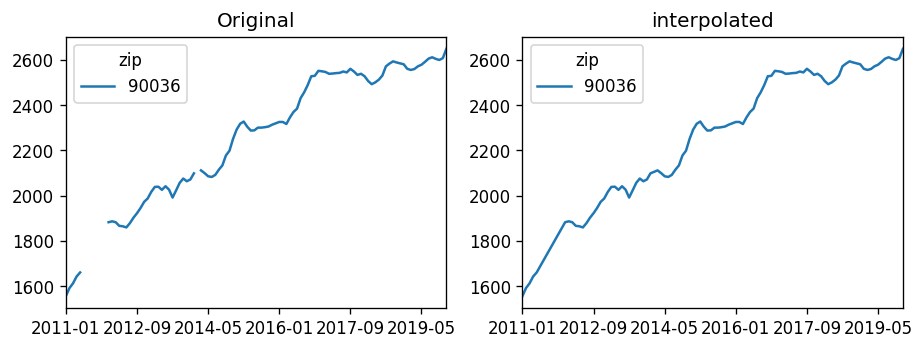

In [133]:
plot_interpolate('90036')

## EDA

In [134]:
# plt.plot(la.T)

In [135]:
import json

with open('../data/la_zip-code-tabulation-areas-2012.geojson', 'r') as jsonFile:
    la_json = json.load(jsonFile)

In [136]:
la_json['features'][0]['properties']['name']

'90001'

In [137]:
import folium

In [138]:
rent_zip = pd.DataFrame({'zip':city.index,'2019':city.iloc[:,-12:].mean(axis=1)})

la_geo = f'../data/la_zip-code-tabulation-areas-2012.geojson'

m_rent = folium.Map(location=[34.0522, -118.2437],zoom_start=10)

folium.Choropleth(
    geo_data=la_geo,
    name='choropleth',
    data=rent_zip,
    columns=['zip', '2019'],
    key_on='feature.properties.name', # Use 'feature', not 'features'. this seems to be a bug
    fill_color='RdBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    bins = 10,
    nan_fill_opacity = 0,
    legend_name='Zillow Rent Index in 2019'
).add_to(m_rent)

folium.LayerControl().add_to(m_rent)

m_rent

# ADP Data

# Import

In [171]:
city_zip = region.reset_index()[['zip']]
zri = city.reset_index()

In [162]:
data_adp = []

import glob
files = glob.glob('../data/adp/homezip*')

for i in range(len(files)):
    print('File: ',files[i])
    tmp = pd.read_csv(files[i],
                   dtype={'yyyymm':'object','home_zip':'object','employer_cnt':'object','ee_cnt':'object'})
    print(np.sum(tmp['home_zip'].isin(city_zip['zip'])))
    data_adp.append(city_zip.merge(tmp,how='left',left_on='zip',right_on='home_zip'))

File:  ../data/adp/homezip-000000000001.csv
336
File:  ../data/adp/homezip-000000000000.csv
363
File:  ../data/adp/homezip-000000000002.csv
372
File:  ../data/adp/homezip-000000000003.csv
357
File:  ../data/adp/homezip-000000000007.csv
349
File:  ../data/adp/homezip-000000000012.csv
398
File:  ../data/adp/homezip-000000000006.csv
340
File:  ../data/adp/homezip-000000000010.csv
406
File:  ../data/adp/homezip-000000000004.csv
384
File:  ../data/adp/homezip-000000000005.csv
337
File:  ../data/adp/homezip-000000000011.csv
383
File:  ../data/adp/homezip-000000000008.csv
389
File:  ../data/adp/homezip-000000000009.csv
381


In [163]:
adp = pd.concat(data_adp)
adp.shape

(4795, 247)

# Data Cleaning

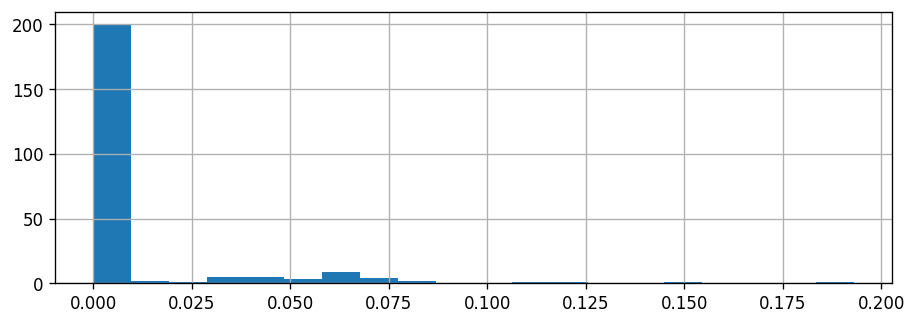

In [167]:
missing = adp.isna().mean(axis=0)
missing.hist(bins=20) 

In [166]:
adp = adp.loc[:,adp.columns[missing < 0.2]]

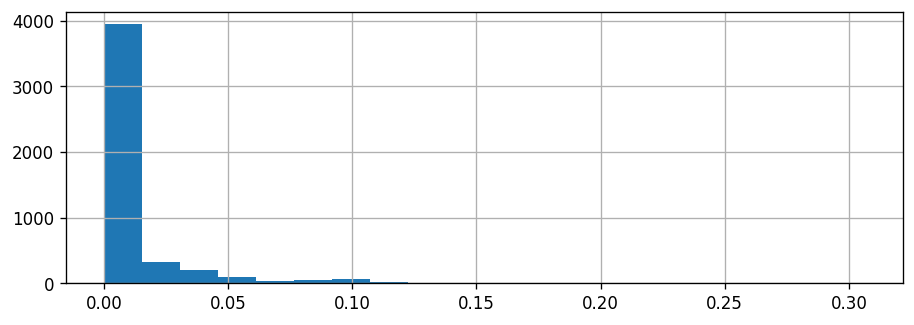

In [168]:
missing = adp.isna().mean(axis=1)
missing.hist(bins=20) 

In [169]:
groupby = adp.groupby('zip')
for key, group in groupby:
    print(key,group.shape)

90002 (137, 235)
90003 (137, 235)
90004 (137, 235)
90006 (137, 235)
90007 (137, 235)
90011 (137, 235)
90015 (137, 235)
90016 (137, 235)
90018 (137, 235)
90019 (137, 235)
90026 (137, 235)
90027 (137, 235)
90029 (137, 235)
90031 (137, 235)
90032 (137, 235)
90033 (137, 235)
90034 (137, 235)
90035 (137, 235)
90036 (137, 235)
90037 (137, 235)
90039 (137, 235)
90042 (137, 235)
90043 (137, 235)
90044 (137, 235)
90046 (137, 235)
90047 (137, 235)
90048 (137, 235)
90061 (137, 235)
90062 (137, 235)
90065 (137, 235)
90291 (137, 235)
90292 (137, 235)
90731 (137, 235)
90744 (137, 235)
91601 (137, 235)


In [172]:
comb = []

for key, group in groupby:
    if group.shape[0] == 137:
        zipcode = key
        
        adp_one = group.sort_values('yyyymm')
        adp_one['year'] = adp_one['yyyymm'].map(lambda t: int(t[:4]))
        adp_one['month'] = adp_one['yyyymm'].map(lambda t: int(t[-2:]))
        adp_one['yyyymm'] = adp_one['yyyymm'].map(lambda m: m[:4]+'-'+m[4:])
        adp_one = adp_one.drop(['home_zip'],axis=1).rename(columns={'yyyymm':'time'}).set_index(['time','zip'])
        adp_one = adp_one.astype({'employer_cnt':'float64','ee_cnt':'float64'})
        adp_one = adp_one.interpolate(method='linear',limit_direction='both', axis=0)

        zri_one = zri[zri['zip'] == zipcode].set_index('zip').T.reset_index()
        zri_one['zip'] = zipcode
        zri_one.columns = ['time','zri','zip']
        zri_one = zri_one.set_index(['time','zip'])

        comb_one = adp_one.merge(zri_one,left_on = ['time','zip'],right_on = ['time','zip'], how='inner')
        comb.append(comb_one)

In [173]:
full = pd.concat(comb,axis=0).sort_index()

In [174]:
test = full.loc[(slice('2019-01','2019-09'),slice(None)),:]
train = full.loc[(slice('2018-12'),slice(None)),:]

In [175]:
X_train = train.iloc[:,:-1]
X_test = test.iloc[:,:-1]
y_train = train.iloc[:,-1]
y_test = test.iloc[:,-1]

# Normalization

In [176]:
from sklearn.preprocessing import StandardScaler

In [177]:
scl = StandardScaler()
scl = scl.fit(X_train)

In [180]:
X_train_scl = pd.DataFrame(scl.transform(X_train),columns=X_train.columns,index=X_train.index)
X_test_scl = pd.DataFrame(scl.transform(X_test),columns=X_test.columns,index=X_test.index)

# Build Models

In [185]:
import math
def evaluate(data_X_train,data_y_train,data_X_test,data_y_test,model):
    rss = np.sum((data_y_train - model.predict(data_X_train))**2)
    print('RMSE, train: ',math.sqrt(rss/data_X_train.shape[0]))
    rss = np.sum((data_y_test-model.predict(data_X_test))**2)
    print('RMSE, test: ',math.sqrt(rss/data_X_test.shape[0]))

    print('R^2, train: ', model.score(data_X_train,data_y_train))
    print('R^2, test: ', model.score(data_X_test,data_y_test))

In [187]:
def plot_residual(data_X,data_y,model,month=''):
    plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
    fig, (ax1,ax2) = plt.subplots(1, 2)
    if month:
        mask = data_y.index.map(lambda idx: idx[0] == month).tolist()
        ax1.scatter(data_y[mask],model.predict(data_X[mask])-data_y[mask])
        ax2.scatter(data_y[mask],(model.predict(data_X[mask])-data_y[mask])/data_y[mask])
    else:
        ax1.scatter(data_y,model.predict(data_X)-data_y)
        ax2.scatter(data_y,(model.predict(data_X)-data_y)/data_y)

## Linear Model

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

In [182]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [186]:
evaluate(X_train,y_train,X_test,y_test,lm)

RMSE, train:  73.07571119104809
RMSE, test:  191.16515372200143
R^2, train:  0.9662417662285213
R^2, test:  0.6062398102161497


Overfit!

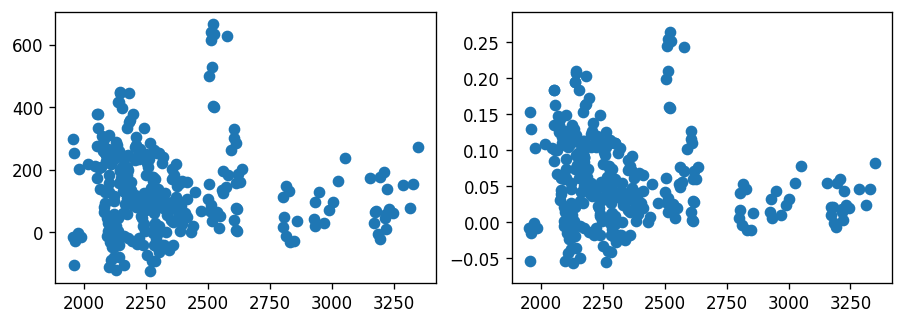

In [188]:
plot_residual(X_test,y_test,lm)

## Lasso

In [189]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [190]:
lasso = Lasso(max_iter=100000, alpha=0.1)

# alpha = 10**np.linspace(-8,0,50)
# alpha = [0.01]
# params = {'alpha': alpha}
# grid_search_lasso = GridSearchCV( estimator=lasso, param_grid=params )
# grid_search_lasso.fit(X_train_scl,y_train)

%time lasso.fit(X_train_scl,y_train)

CPU times: user 57.3 s, sys: 2.85 s, total: 1min
Wall time: 38.1 s


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [191]:
evaluate(X_train_scl,y_train,X_test_scl,y_test,lasso)

RMSE, train:  79.0580584887929
RMSE, test:  184.33211030821408
R^2, train:  0.9604882828420399
R^2, test:  0.6338860010758962


Still overfit!

# Gradient Boosting

In [195]:
def get_importance(columns,importances,top=10):
    top_list = sorted(list(zip(columns, importances)), key = lambda x: x[1], reverse = True)[0:top]
    top_list = pd.DataFrame(top_list,columns=['Feature','Importance'])
    print(top_list)

In [192]:
from sklearn.ensemble import GradientBoostingRegressor

In [193]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [194]:
evaluate(X_train,y_train,X_test,y_test,gb)

RMSE, train:  55.02268331925127
RMSE, test:  132.38113470471586
R^2, train:  0.9808610923471665
R^2, test:  0.8111719346515431


Overfit?

In [196]:
get_importance(X_train.columns,gb.feature_importances_)

                           Feature  Importance
0  ann_gross_pay_proj_10perc_value    0.363914
1    ann_net_pay_proj_25perc_value    0.109128
2       ann_gross_pay_proj_gen_y_m    0.080767
3          rate_amt_s_50perc_value    0.077945
4             net_pay_25perc_value    0.049026
5                  reg_temp_nt_cnt    0.029881
6          rate_amt_s_10perc_value    0.028705
7                             year    0.027787
8    ann_gross_pay_obs_mle_gen_x_m    0.021024
9   ann_gross_pay_proj_mle_gen_x_m    0.018742


Very different with NYC and Manhattan. Lower percentage values matter more?

Top two features, ann_gross_pay_proj_10perc_value and ann_net_pay_proj_25perc_value, show that low income population has more impact on the rent price? This is difference from NYC/Manhattan.

Use all homes instead of apartment only ZRI. See if it's still the case.